# CNN for acoustic scene classification: musical intruments

Date: November 11, 2018 and March 23, 2019

## Preparing data set for CNN

In [20]:
DATASET_FOLDER = '../dataset/data_music'

%run ../oscilloscope/script/dataset.py
%matplotlib inline

ds = DataSet(DATASET_FOLDER)
#ds.serialize()
train_data, train_labels, test_data, test_labels = ds.generate()['mfsc']
shape = ds.shape
class_labels = ds.class_labels
class_labels

['piano',
 'classical_guitar',
 'framenco_guitar',
 'blues_harp',
 'tin_whistle',
 'silence']

In [2]:
shape

(64, 40)

### CNN model

In [3]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 32)         4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 3, 32)          0         
__________

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [6]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 384 samples, validate on 216 samples
Epoch 1/50
384/384 [==============================] - 15s 38ms/step - loss: 2.4723 - acc: 0.3490 - val_loss: 0.9385 - val_acc: 0.5833
Epoch 2/50
384/384 [==============================] - 12s 32ms/step - loss: 1.2269 - acc: 0.5391 - val_loss: 0.7150 - val_acc: 0.7546
Epoch 3/50
384/384 [==============================] - 12s 31ms/step - loss: 0.8589 - acc: 0.6615 - val_loss: 0.6931 - val_acc: 0.6944
Epoch 4/50
384/384 [==============================] - 12s 32ms/step - loss: 0.8000 - acc: 0.6849 - val_loss: 0.6449 - val_acc: 0.7685
Epoch 5/50
384/384 [==============================] - 12s 32ms/step - loss: 0.6868 - acc: 0.7266 - val_loss: 0.6087 - val_acc: 0.7454
Epoch 6/50
384/384 [==============================] - 13s 33ms/step - loss: 0.6659 - acc: 0.7396 - val_loss: 0.4984 - val_acc: 0.7824
Epoch 7/50
384/384 [==============================] - 12s 32ms/step - loss: 0.5873 - acc: 0.7917 - val_loss: 0.5289 - val_acc: 0.7639
Epoch 8/50
384/3

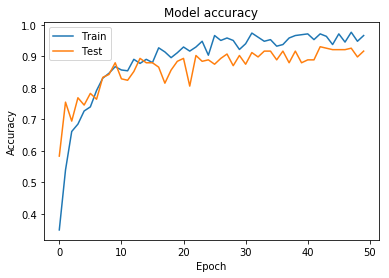

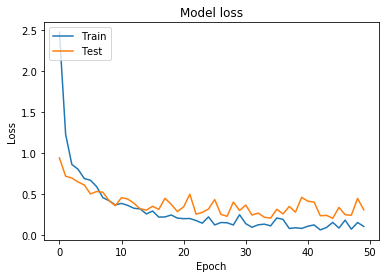

In [21]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [22]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/musical_instruments_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [23]:
del model
model = models.load_model(filename)

In [24]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
class_labels

['piano',
 'classical_guitar',
 'framenco_guitar',
 'blues_harp',
 'tin_whistle',
 'silence']

In [25]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0,  99],
       [  0,  99,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99],
       [  0,   0,  50,  49,   0,   0],
       [  0,   0,   0,   0, 100,   0],
       [  0,   0,  99,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99],
       [  0,   0,   0,   0,   0,  99],
       [  0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0]])

In [26]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

'tin_whistle'

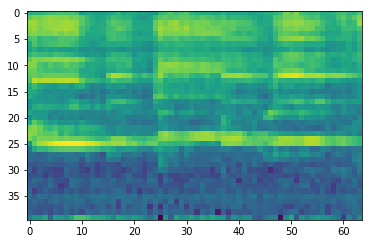

In [27]:
image_number = 55

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

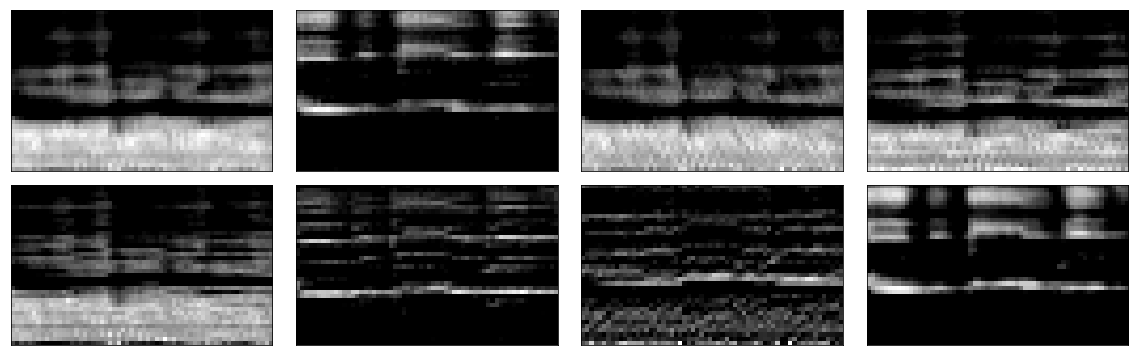

In [28]:
plot_layer(activations, image_number, 0, 4)

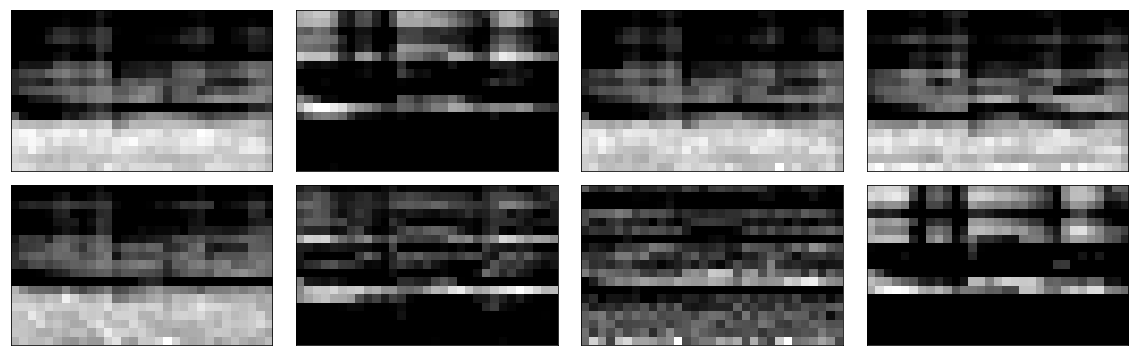

In [29]:
plot_layer(activations, image_number, 1, 4)

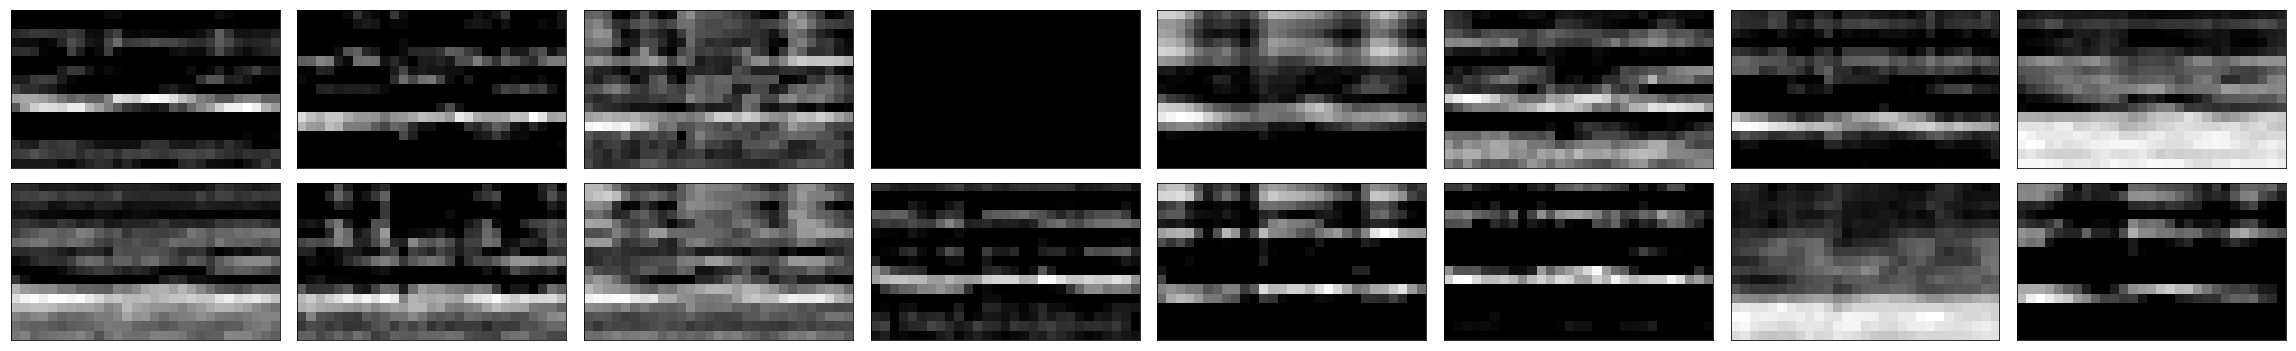

In [33]:
plot_layer(activations, image_number, 2, 8)

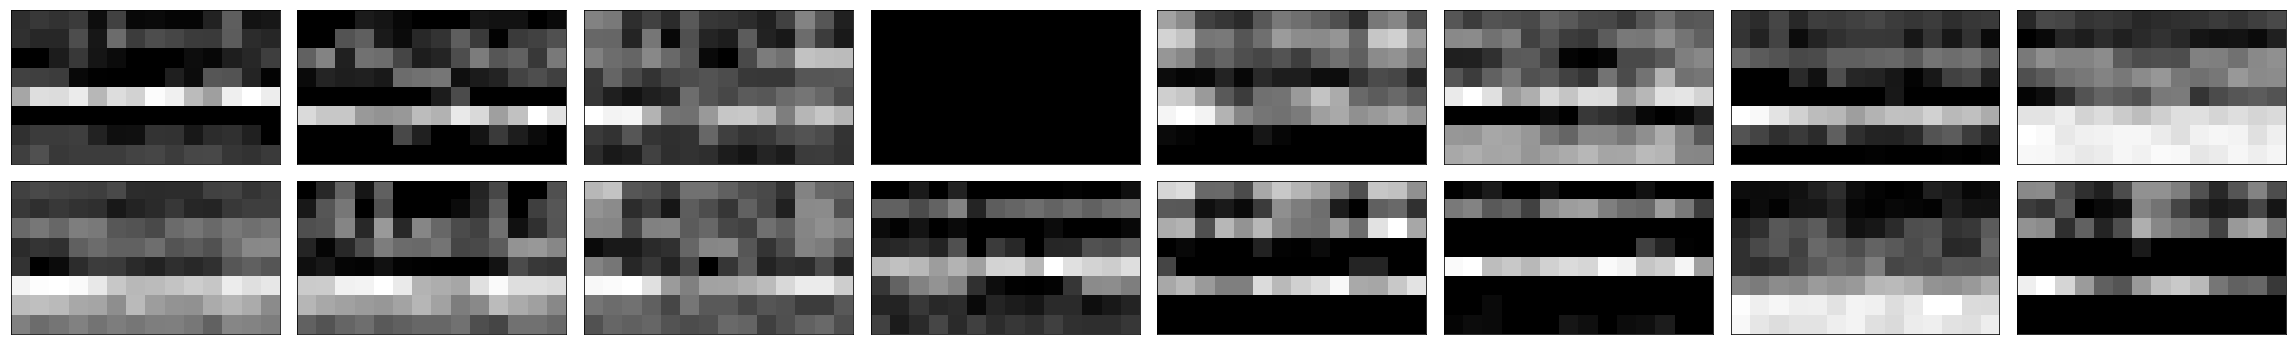

In [34]:
plot_layer(activations, image_number, 3, 8)

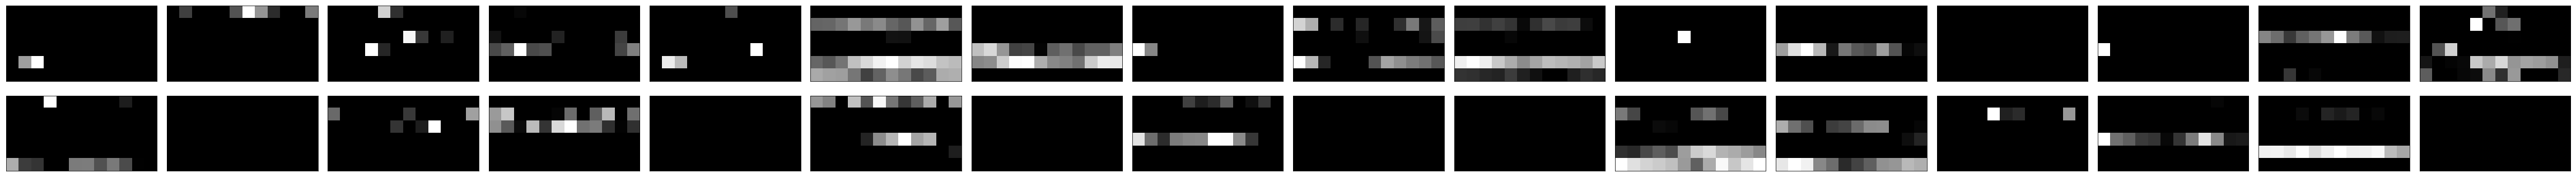

In [35]:
plot_layer(activations, image_number, 4, 16)

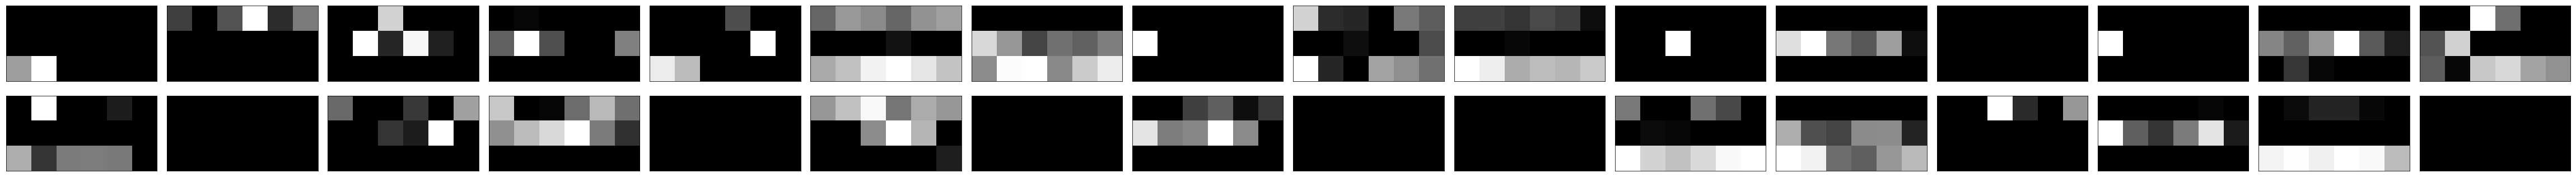

In [36]:
plot_layer(activations, image_number, 5, 16)